In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI
import os

In [2]:
load_dotenv()
api_key = os.getenv("GEMINI_API_KEY")

In [3]:
model = ChatGoogleGenerativeAI(
    model= "gemini-2.5-flash",
    temperature=1.0,
    max_retries=2,
    google_api_key=api_key,
)

In [4]:
class BlogState(TypedDict):
    topic: str
    outline: str
    blog: str

In [5]:
def get_outline(state:BlogState):
    prompt = f"Create a detailed outline for a blog post about {state['topic']}."
    outline = model.invoke(prompt).content
    state["outline"] = outline
    return state    

In [6]:
def generate_blog(state:BlogState):
    prompt = f"Write a comprehensive blog post based on the following outline:\n{state['outline']}"
    blog = model.invoke(prompt).content
    state["blog"] = blog
    return state

In [7]:
graph = StateGraph(BlogState)

# add nodes
graph.add_node("get_outline", get_outline)
graph.add_node("generate_blog", generate_blog)

# add edges
graph.add_edge(START, "get_outline")
graph.add_edge("get_outline", "generate_blog")
graph.add_edge("generate_blog", END)

# compile graph
workflow = graph.compile()

In [8]:
initial_state ={
    "topic" : "btech life"
}
final_state = workflow.invoke(initial_state)
print(final_state)

{'topic': 'btech life', 'outline': 'Here\'s a detailed outline for a blog post about B.Tech life, designed to be engaging, informative, and relatable:\n\n---\n\n## Blog Post Title Ideas:\n*   B.Tech Life: More Than Just Code & Classes – An Unfiltered Guide\n*   The B.Tech Odyssey: Navigating Academics, Friendships, and the Future\n*   Surviving and Thriving in B.Tech: Your Ultimate College Companion\n*   From Freshers to Final Year: The Rollercoaster Ride of B.Tech Life\n\n---\n\n## **Detailed Outline: The B.Tech Odyssey: Navigating Academics, Friendships, and the Future**\n\n**I. Introduction: The Grand Entrance to Engineering**\n    *   **A. Hook:** Start with a common sentiment – the excitement, apprehension, or perhaps the myth surrounding B.Tech life. (e.g., "Heard the stories? The late nights, the coding marathons, the legendary fests?")\n    *   **B. What is B.Tech Life Really About?** Briefly define it as a unique blend of intense academics, vibrant social experiences, and prof

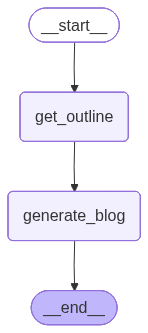

In [9]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())